In [150]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
#file = 'tox21_reference_search_results_parallel2.csv'
file = 'tox21_reference_search_results_tuned_f1_opt.csv'
df = pd.read_csv(file)

In [152]:
cmc_df = df[df.dataset == 'CMC']
nci_df = df[df.dataset == 'NCI']

In [153]:
cmc_best_time = df[(df.dataset == 'CMC') & (df.model == 'tunedBest')].time.sum()
cmc_consensus_time = df[(df.dataset == 'CMC') & (df.model == 'tunedConsensus')].time.sum()
print('cmc best time {}'.format(cmc_best_time))
print('cmc consensus time {}'.format(cmc_consensus_time))

cmc best time 97.05300000000001
cmc consensus time 146.013


In [154]:
nci_best_time = df[(df.dataset == 'NCI') & (df.model == 'tunedBest')].time.sum()
nci_consensus_time = df[(df.dataset == 'NCI') & (df.model == 'tunedConsensus')].time.sum()
print('nci best time {}'.format(nci_best_time))
print('nci consensus time {}'.format(nci_consensus_time))

nci best time 436.268
nci consensus time 5467.4130000000005


In [155]:
df['modelAndDataset'] = df['model'] + ' ' + df['dataset']
df.columns

Index(['dataset', 'model', 'estimator', 'features', 'toxField', 'time',
       'dataset_compounds', 'tested_compounds', 'n_predicted', 'hitrate',
       'modelAndDataset'],
      dtype='object')

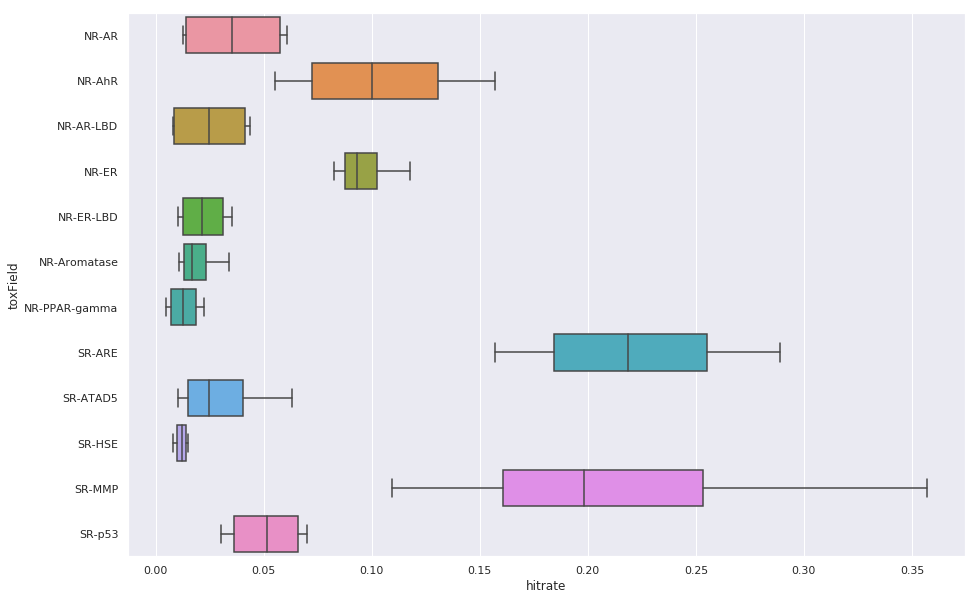

In [156]:

sns.set()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.boxplot(y="toxField", x="hitrate", data=df, ax=axes)

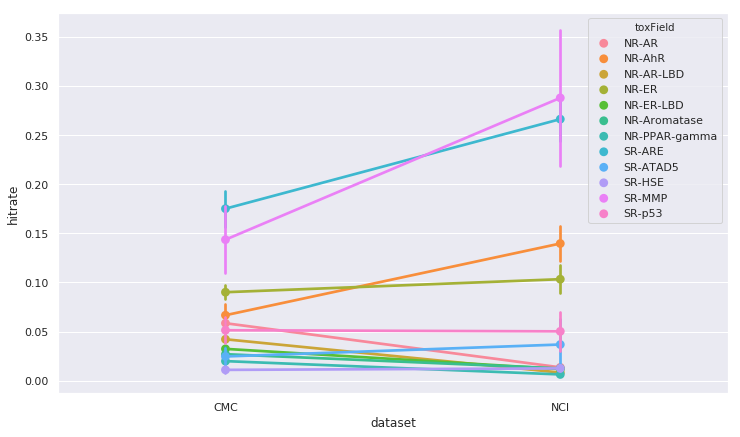

In [157]:
sns.set()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
sns.pointplot(x="dataset", y="hitrate", hue='toxField', data=df, ax=axes)
#sns.swarmplot(x="dataset", y="hitrate", data=df, ax=axes, color='black')

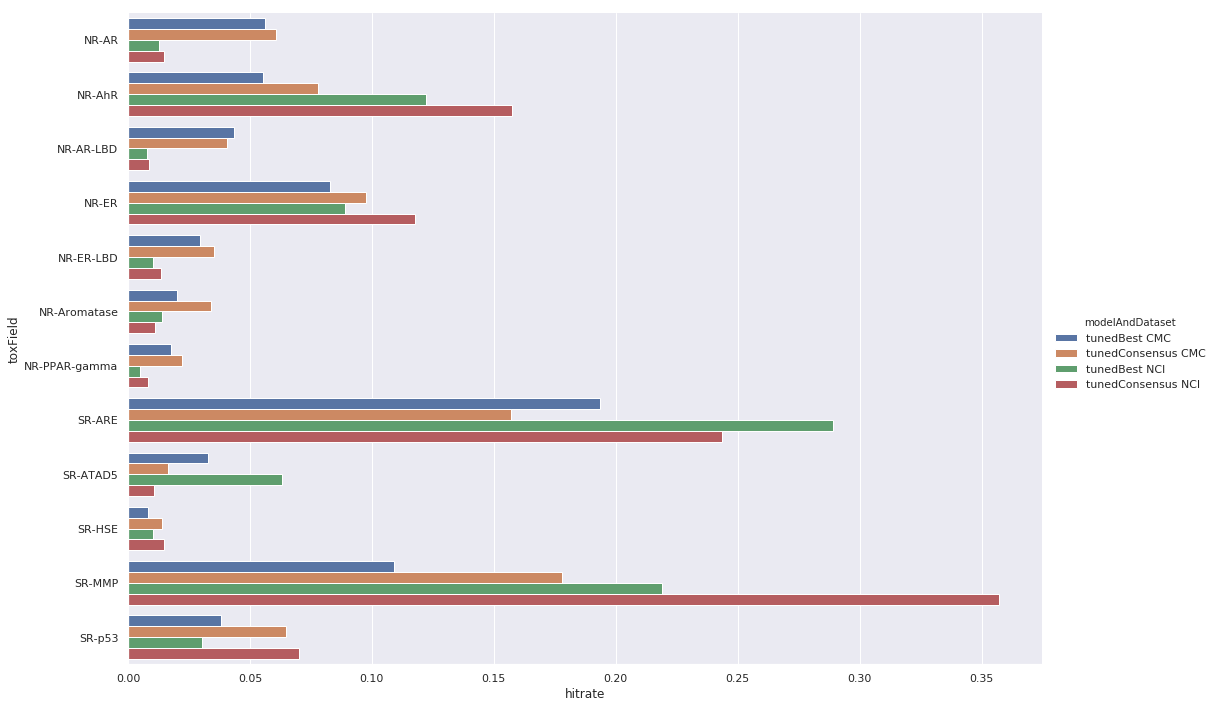

In [158]:

sns.set()
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.catplot(y="toxField", x="hitrate", data=df, hue='modelAndDataset', kind='bar', height=10, aspect=1.5)

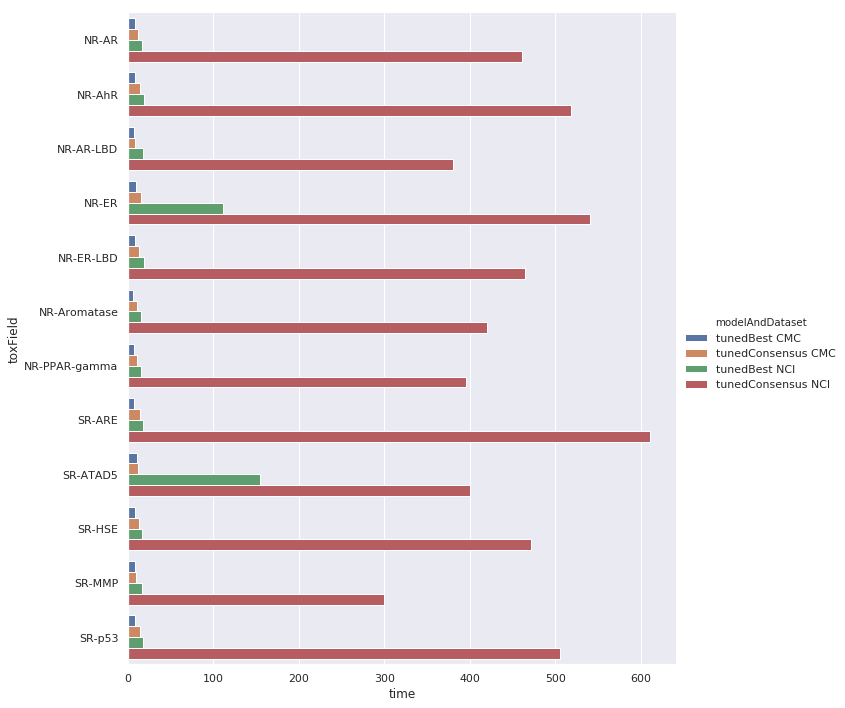

In [159]:
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.catplot(y="toxField", x="time", data=df, hue='modelAndDataset', kind='bar', height=10, aspect=1.0)

In [160]:
tox21_df = pd.read_csv('tox21_10k_data_hitrate.csv')
tox21_df

,toxField,noCompounds,noActive,hitrate
0,NR-AR,8715,359,0.041193
1,NR-AhR,7633,930,0.121839
2,NR-AR-LBD,8064,273,0.033854
3,NR-ER,7248,904,0.124724
4,NR-ER-LBD,8189,419,0.051166
5,NR-Aromatase,6702,336,0.050134
6,NR-PPAR-gamma,7667,194,0.025303
7,SR-ARE,6751,1001,0.148274
8,SR-ATAD5,8521,335,0.039315
9,SR-HSE,7695,374,0.048603


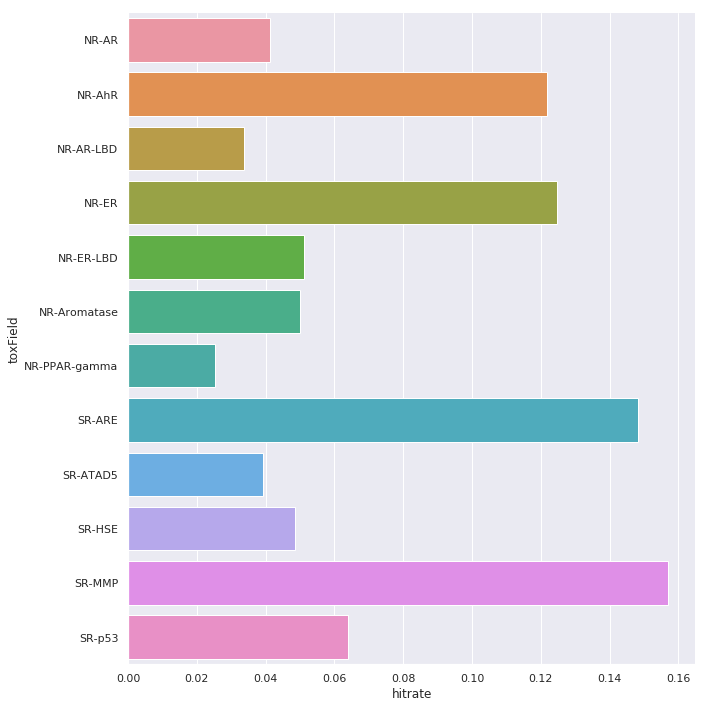

In [161]:
sns.catplot(y="toxField", x="hitrate", data=tox21_df, kind='bar', height=10, aspect=1.0)